## Tutorial 1: Reading and plotting a spectrum

We will start by reading and plotting a spectrum from the ESPRESSO spectrograph.

In [137]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

In [138]:
from actin2 import actin2
actin = actin2.ACTIN()
print(actin.__doc__)

The ACTIN class. Reads fits files and calculates activity indices.

    Attributes:
        ReadSpec (actin2.ReadSpec) : Object that reads spectrum and   
            headers.
        IndTable (actin2.IndTable) : Object containing the 
            indices table.
        ProcessSpec (actin2.ProcessSpec) : Object to process the 
            spectrum.
    


First we are going to use a fits file provided by `actin` in the ``test`` directory.

In [139]:
import os, glob
files = glob.glob(os.path.join(os.pardir, os.pardir, os.pardir, "actin2/test/ESPRESSO", "*_S1D_A.fits"))
files

['../../../actin2/test/ESPRESSO/r.ESPRE.2018-09-03T08:38:21.545_S1D_A.fits']

Now we read the spectrum by calling the class `actin.ReadSpec` with the file name inside `files` the list. The class ``actin.ReadSpec`` can read one fits file and identify the spectrum to read it automatically.

In [140]:
read_spec = actin.ReadSpec(files[0])

Running ReadSpec
loaded file: ../../../actin2/test/ESPRESSO/r.ESPRE.2018-09-03T08:38:21.545_S1D_A.fits
loaded instr: ESPRESSO
Reading spectrum file
Reading CCF file


The spectrum data is now stored in `read_spec.spec` which includes dictionaries with the spectrum and headers

In [141]:
read_spec.spec.spectrum

{'flux_raw': array([0., 0., 0., ..., 0., 0., 0.]),
 'flux_err': array([0., 0., 0., ..., 0., 0., 0.]),
 'wave_raw': array([3770.94647464, 3770.95276384, 3770.95905306, ..., 7897.81168607,
        7897.82485783, 7897.8380296 ]),
 'wave': array([3770.94647464, 3770.95276384, 3770.95905306, ..., 7897.81168607,
        7897.82485783, 7897.8380296 ]),
 'flux': array([0., 0., 0., ..., 0., 0., 0.])}

In [142]:
read_spec.spec.headers

{'obj': 'WASP-76',
 'instr': 'ESPRESSO',
 'date_obs': '2018-09-03T08:38:21.544',
 'bjd': 2458364.86841898,
 'rv': -1198.40358654132,
 'rv_err': 0.00053474023623152,
 'berv': 20323.1116348287,
 'fwhm': 9489.7932752335,
 'fwhm_err': 0.00106948047246304,
 'cont': 59.8806426078076,
 'cont_err': 0.00674842708267666,
 'bis': -14.40933698031,
 'bis_err': 0.00106948047246304,
 'rv_step': 0.5,
 'rv_ref_pix': -21.11,
 'snr_med': 93.12833661692895,
 'ftype': 'S1D',
 'spec_flg': 'OK',
 'noise': 8.8,
 'file': 'r.ESPRE.2018-09-03T08:38:21.545_S1D_A.fits'}

To see the spectrum we can call the `plot` method to plot the full spectrum. If the file was a 2D spectrum, we could have used the `order` option in the `plot` method to select the order to plot. The option ```show=False``` can be used to produce the plot without calling `plt.show()` so the plot can be used afterwards.

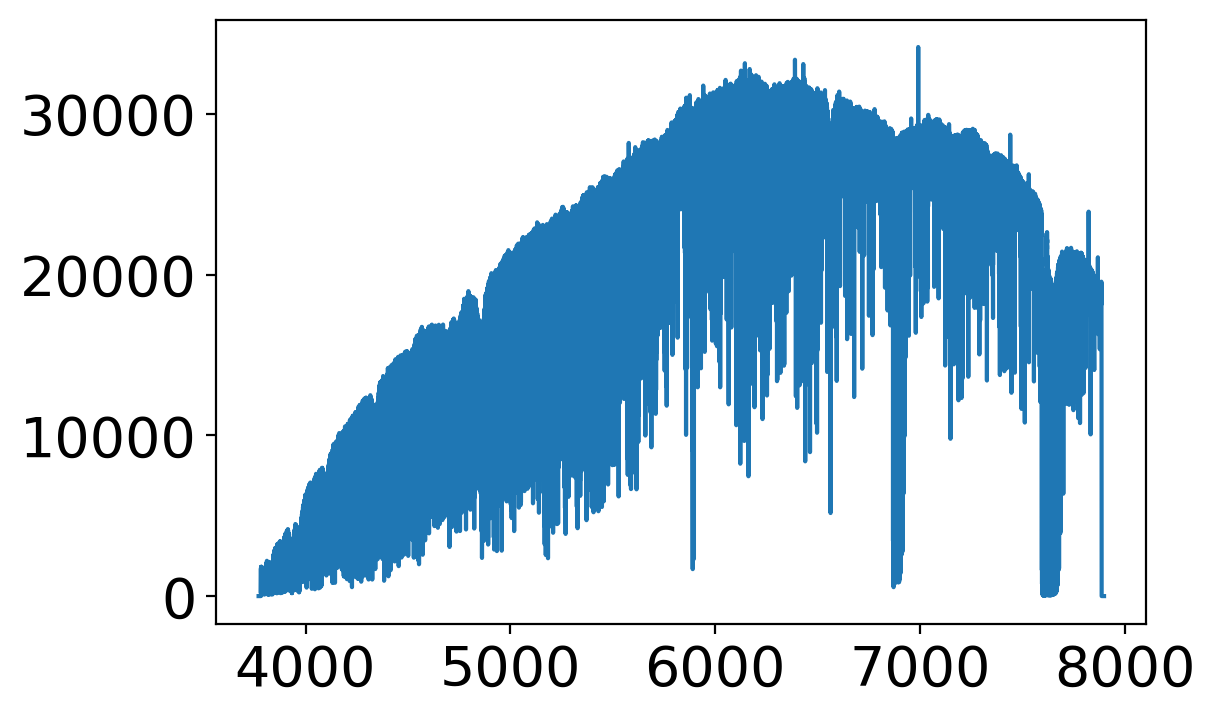

In [143]:
read_spec.plot(show=True)

The `plot` method accepts keywords used in `matplotlib.pylab.plot` so the plot parameters can be changed easily.